<img style='float: right' src="http://stem.uhh.hawaii.edu/images/262931_10150265188993752_3537337_n.jpg" width="200" height="40"> <br> <br>

# AC 2017 Intro to EE Day 6
## Fourier Transforms

Fourier transforms will form the foundation of the rest of our work with signals during the final week of the course. In essence, Fourier transforms translate a signal from the time domain to the frequency domain. This work will rely on all of the skills and packages we've learned so far.

### Preamble
All of the packages needed for this notebook are below. Once you have exectued the cell which imports a package, it will be imported and callable for the rest of the notebook. You do not need to reimport any packages for the exercises. You may simply call functions from those packages throughout the whole notebook.

In [77]:
from IPython.core.display import HTML
from IPython.core.pylabtools import figsize
figsize(16,9)

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
import numpy as np
import math as m
from scipy import signal
import random as r
import sympy as sym

## Approximating a Square Wave with a Fourier Transfrom

<img style='float: center' src="https://upload.wikimedia.org/wikipedia/commons/1/1a/Fourier_series_square_wave_circles_animation.gif"> <br> <br>


## Fourier Transform in Time and Frequency Domain
The animation below shows the numerous sine wave components that contribute to the approximation of the square wave. The Blue plot show the component frequencies and their relative contribution to the red approximation. The function $\hat{f}$ corresponts to the frequency spectrum representing the time series $f$.

<img style='float: center' src="https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif"> <br> <br>


## Continuous Fourier Transform of a Rectangular Function
This animation shows the approximation of a square wave $f(x)$ by an increasing number of sine waves. The function $\hat{f}(\xi)$ gives the representation of $f(x)$ in Fourier space. (This is equivalent to the $F(\omega)$ we had beore) The animations depicts the transfromation of the square wave in $x$ to a sinc function in $\xi$ and then the opposite transfromation of a sinc function in $x$ to a square wave in $\xi$. If you are not familiar with a sinc function, $$\text{sinc}(x) = \frac{\sin(x)}{x}$$ (This is a very important function that we will talk about next week. If you want to look it up, just remember the shape it has)

Here $x$ can represent time ($t$) or distance ($x$) and $\xi$ can represent frequency ($\omega$) or wavenumber ($k$) respectively. The Fourier transformations shown are are identical if transforming from $t \rightarrow \omega$ or $x \rightarrow k$. 

<img style='float: center' src="https://upload.wikimedia.org/wikipedia/commons/a/a3/Continuous_Fourier_transform_of_rect_and_sinc_functions.gif"> <br> <br>


## Generating Sinusoids in Time

We'll start by create a *time domain* sinusoid. And looking at its Fourier Transform. We are getting into larger projects so you can expect less writing and more coding. But pay attention to the comments because they will be helpful.

Here is a function that generates a sinusoid as a `numpy array`. Notice that the indentation ends half way down. This is where the *scope of the function* ends and the *main code* begins.

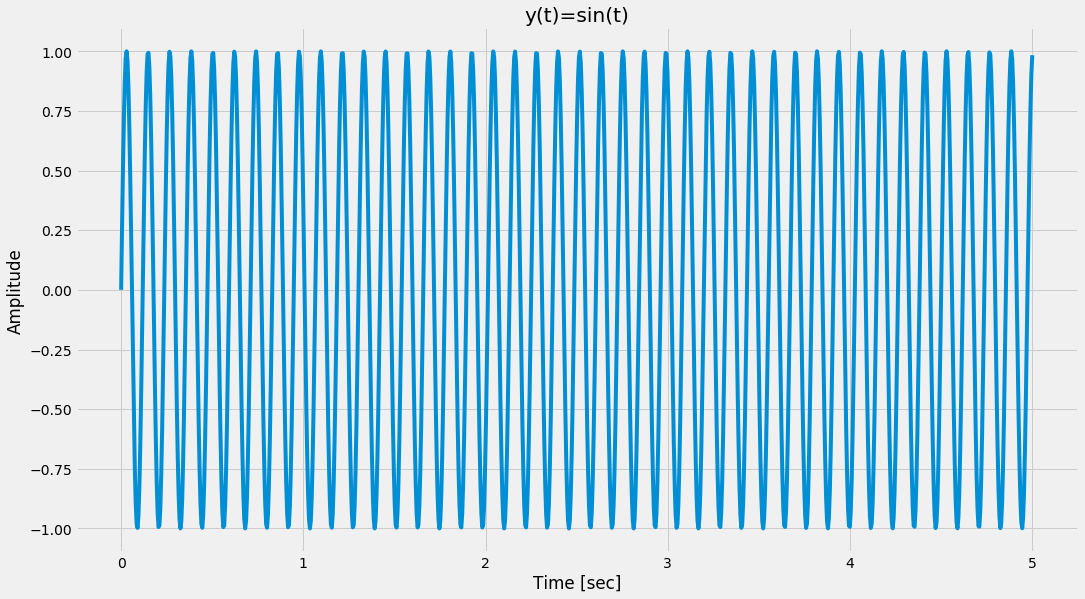

In [78]:
def sinusoid(freq, amp=1., dur=1, fs=1000):
    '''
    Function to generate a sinusoid
    Parameters:
        freq: the desired frequency of the sinusoid
        amp: the amplitude of the sinusoid. Default is 1
        dur: the duration of the sinusoid in seconds. Default is 1 second
        fs: the sampling frequency desired to generate the sinusoid. Default is 1000
    Return:
        y: a numpy array of the sinusoide
        time: a numpy array of the time steps used in generation of the sinusoid
    '''
    #Generate a time array for all these time steps
    time = np.linspace(0,tmax,int(n))

    #Let's normalize our time so 1 second represents 1 cylce around a circle, or 2pi.
    time_norm = 2*m.pi*time

    #We don't need a for loop to calculate the sin at every time step. With np.sin, it can calculate the 
    #sin of every element in the array
    y = amp*np.sin(freq*time_norm)
    
    #Return our sinusoid and the time steps we used
    return y, time

    
#This is where the main code begins
#Specify the sampling frequency
fs = 500.

#How long do we want our sinusoid to be in seconds
dur = 2

#Calculate the number of points for the sinusoid
n = fs*dur

#Frequency of the sinusoid (in Hz)
r.seed(0)
freq = r.random()*10

#Call the function we defined earlier
y, time = sinusoid(freq, dur=tmax, fs=fs)

#Plot the sinusoid
plt.plot(time,y)
plt.title('y(t)=sin(t)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

We all agree that the plot above is a time series which we can treat as a wave for the purposes of this exercise. Before jumping into Fourier transforms, let's first do a few review exercises on waves.

# Wave Exercises

## Ex1
The **period** of a wave is how long it takes to complete 1 cycle. What is the period of this wave? An approximation is acceptable

In [79]:
period = 1/8.5
print period

0.117647058824


## Ex2
1. What is the sampling frequency, $f_{s}$ or fs?
2. What is the nyquist frequency?

In [80]:
#fs=1/2 of the sinusoid frequency, discrete data = 500
#nyquist frequency is 1/2 of the sampling frequency = 250

## Ex3
Without printing it from the code, what is the frequency of the wave? An approximation is acceptable.

In [81]:
#frequency of the wave is 8.5


## Fourier Transform and FFT

The FFT stands for Fast Fourier Transform and allows us the ability to perform the Fourier Transform into frequency space quickly on a computer. We can call it as `np.fft.fft(parameter1, parameter2,...)` where it's first parameter is the time series array. You're welcome to look at the documentation, but it's not as complicated as it looks.

For now, let's continue working with the single sinusoid.

Usual coding practice is to store the Fourier Transform data into a variable with the same name as the time series data, but with all caps. That means **all time domain data should be in lowercase variables and all frequency domain data should be in caps**. Since our time series is `y`, our Fourier Transform will be `Y`

In [82]:
#Perform the Fourier Transform on y. We have to normalize by the number of points in our time series.
Y = np.fft.fft(y)/n

#Get the number of elements in the fourier transform, this will be useful later
N = np.shape(Y)[0]
print N


1000


To double check, we expect `Y` to be a complex `numpy array`

In [83]:
print type(Y)
print Y[0]

<type 'numpy.ndarray'>
(0.00355918393221+0j)


Notice how `Y[0]` is in the form `a+bi` (`i` and `j` are interchangable), this means it's a complex value.

Remember the two important properties of complex values, thay have a **magnitude** and they have a **phase**. For now, let's worry about the magnitude.

The **magnitude** corresponds to amplitude and power. The higher the magnitude, the higher the amplitude of the wave in the time domain. 

From a lecture in week 1, I explained that the **magnitude** of a complex number is the **absolute value** of the complex number. Let's use `np.abs` to find the magnitude of our Fourier Transform.

In [84]:
mag = np.abs(Y)

Now we can plot it

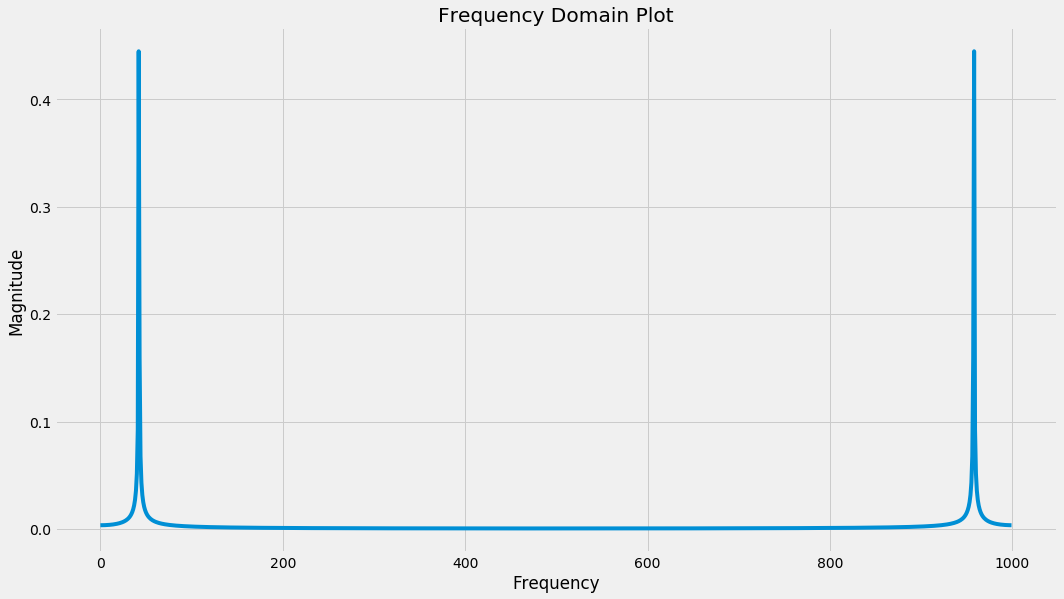

In [85]:
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Like I said in lecture yesterday, **a sinusoid in the time domain is a spike in the frequency domain**. This checks out in our plot!

We also said that our Fourier Transform would be symmetric and it is!

Now, **ignore the numbers on the x-axis**. We know from yesterday, *the normalized frequency goes from 0 to $\pi$ and then $-\pi$ to 0*. This means our x-axis is supposed to go from 0 to $\pi$ and then, *right in the middle*, it switches and goes from $-\pi$ to 0. 

But since the plot is symetric, we only need to deal with the first half!

Let's plot the first half.

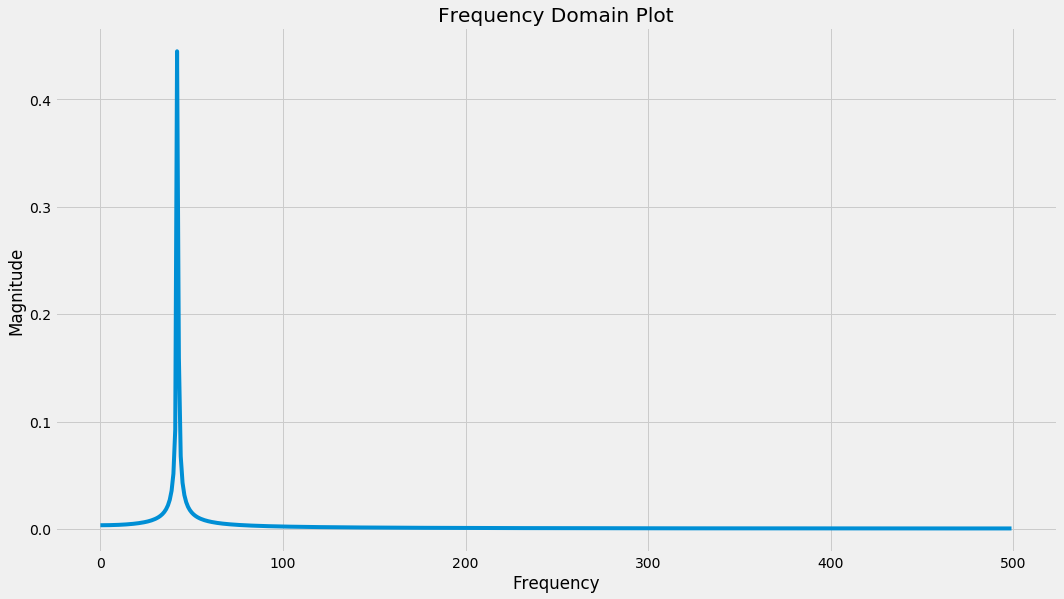

In [86]:
#Take the first half of our Fourier Transform (Remember N is the number of points in Y)
Y = Y[0:N/2]

#Get the magnitude again
mag = np.abs(Y)

#Plot it again!
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

Awesome! 

Now let's fix the numbers we see on the x-axis

We know the range of the x-axis is from 0 to $\pi$ and we know that $\pi$ corresponds to the **Nyquist Frequency** which is $\frac{1}{2}$ the sampling frequency. So

$$x\in(0,\pi) \hspace{1cm} \pi \equiv \frac{1}{2}f_{s} = \frac{1}{2}500 = 250 Hz$$

So our x axis should range from 0 to 250

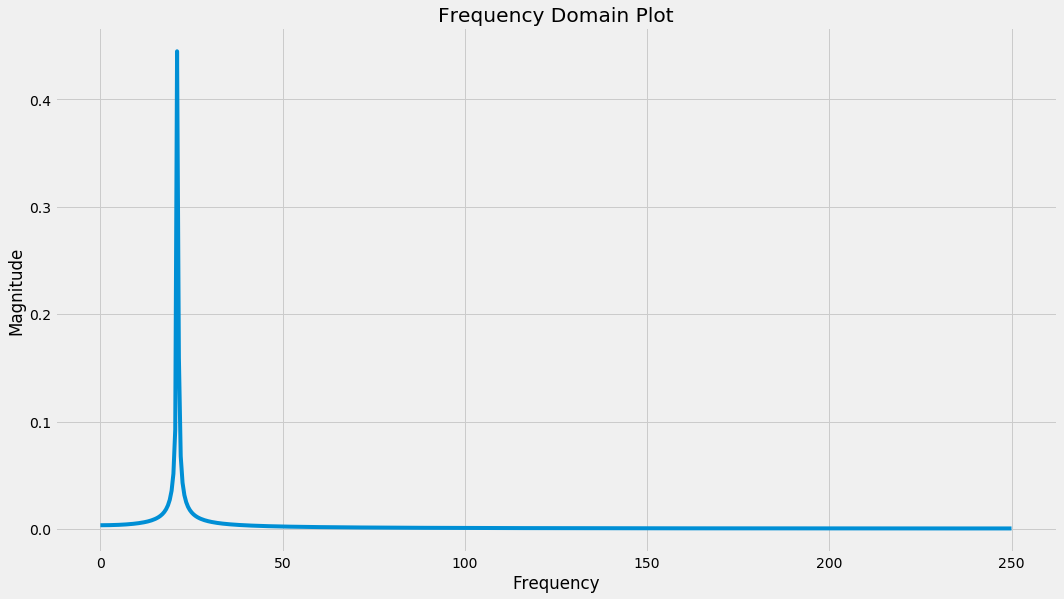

In [87]:
#Create the frequency, w, for the x-axis
w = np.linspace(0,m.ceil(fs/2),int(m.ceil(N/2)))

#Plot it again
plt.plot(w, mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

The last thing to know is that we can scale our y-axis to be whatever we want. We don't really care about the values. What we do care about is the **relative values**. This means we want to know how high a spike is *relative* to another spike.

Often times we use the magnitude squared

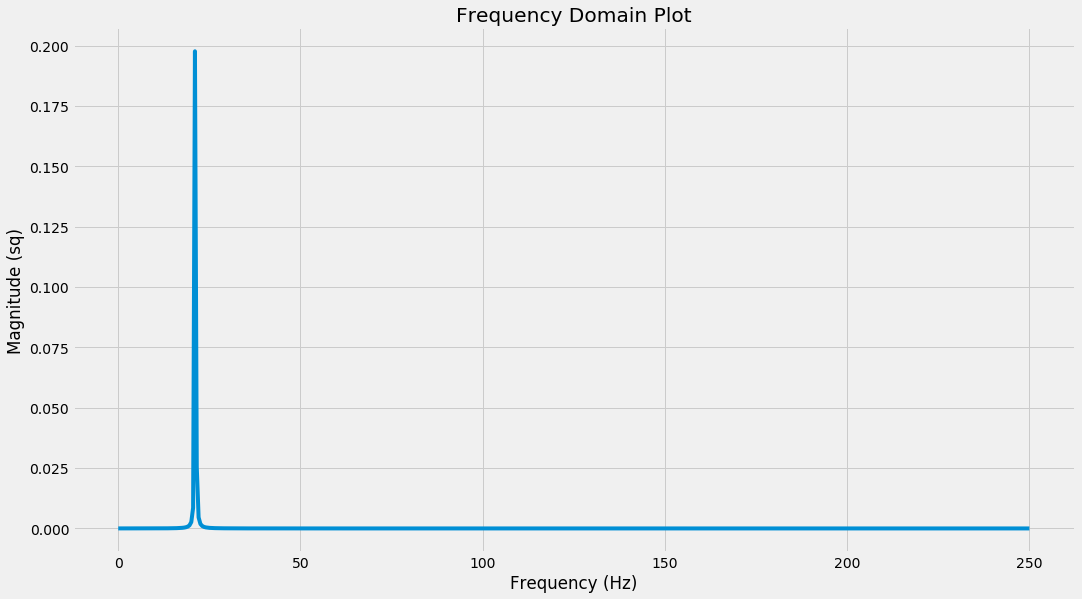

In [88]:
mag = np.abs(Y)**2

#Plot it one last time!
plt.plot(w, mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (sq)')
plt.show()

And we're done.

Since this had a lot of steps, I placed all the code below. 

# Single Sinusoid Fourier Transform Code

In [89]:
def sinusoid(freq, amp=1., dur=1, fs=1000):
    '''
    Function to generate a sinusoid
    Parameters:
        freq: the desired frequency of the sinusoid
        amp: the amplitude of the sinusoid
        dur: the duration of the sinusoid in seconds. Default is 1 second
        fs: the sampling frequency desired to generate the sinusoid
    Return:
        y: a numpy array of the sinusoide
        time: a numpy array of the time steps used in generation of the sinusoid
    '''
    #Generate a time array for all these time steps
    time = np.linspace(0,tmax,int(n))

    #Let's normalize our time so 1 second represents 1 cylce around a circle, or 2pi.
    time_norm = 2*m.pi*time

    #We don't need a for loop to calculate the sin at every time step. With np.sin, it can calculate the 
    #sin of every element in the array
    y = amp*np.sin(freq*time_norm)
    
    #Return our sinusoid and the time steps we used
    return y, time

## Time Domain

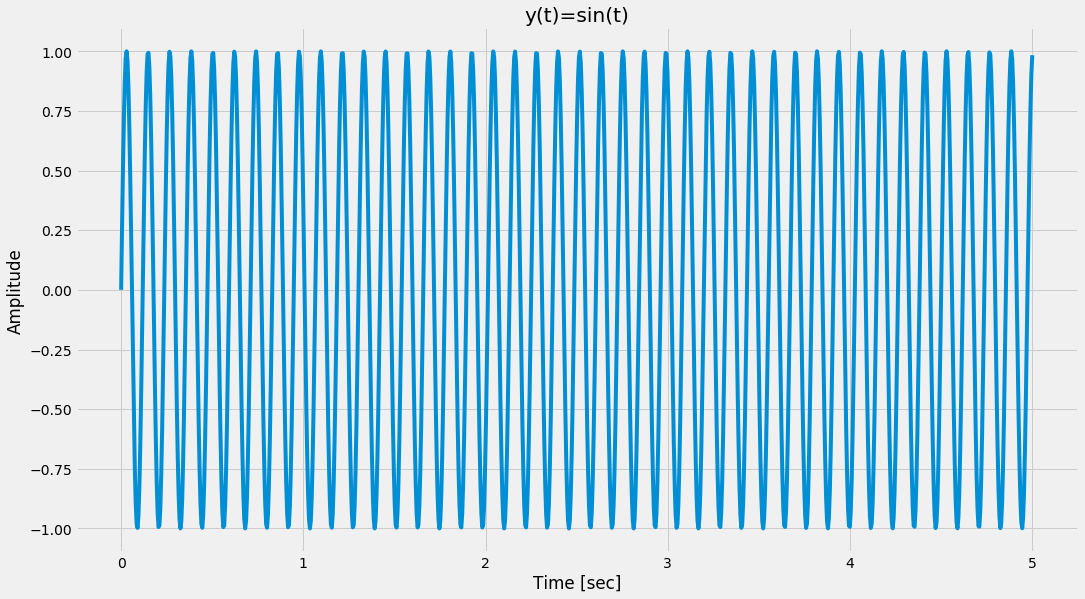

In [90]:
#Specify the sampling frequency
fs = 500.

#How long do we want our sinusoid to be in seconds
dur = 2

#Calculate the number of points for the sinusoid
n = fs*dur

#Frequency of the sinusoid (in Hz)
r.seed(0)
freq = r.random()*10

#Call the function we defined earlier
y, time = sinusoid(freq, dur=tmax, fs=fs)

#Plot the sinusoid in time
plt.plot(time,y)
plt.title('y(t)=sin(t)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

## Frequency Doman 

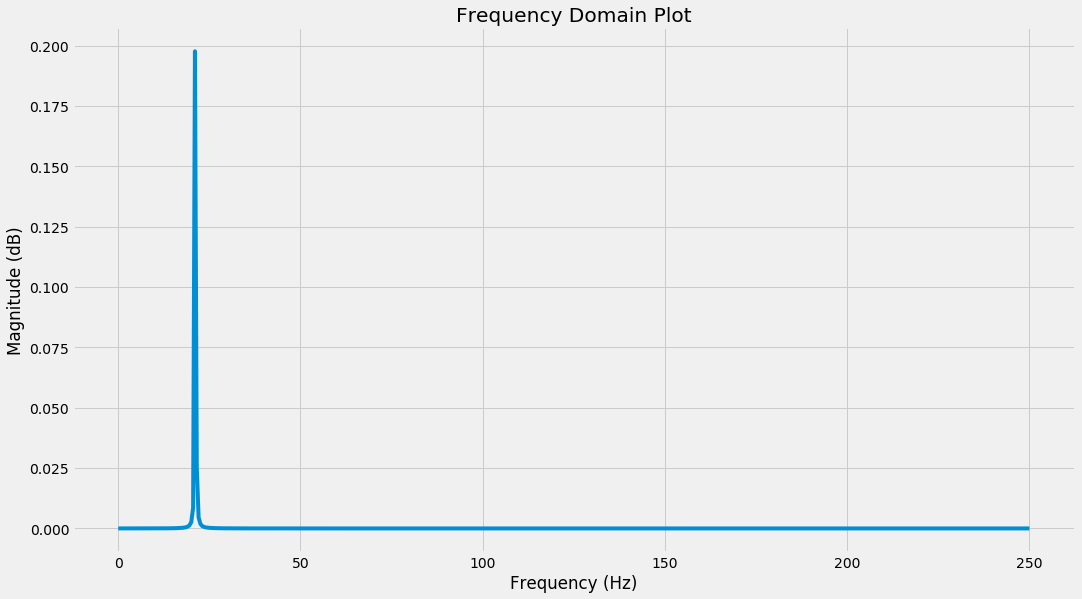

In [91]:
#Take the fft and normalize
Y = np.fft.fft(y)/len(y)

#Use only the first half of the data
Y = Y[0:len(y)/2]

#Get the magnitude squared
mag = np.abs(Y)**2

#Set the x-axis
w = np.linspace(0,m.ceil(fs/2),len(Y))

#Plot it!
plt.plot(w, mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

We can see the spike around 10 Hz represents our sinusoid!

Now let's try it with multiple sin waves

# Sine Wave Superposition
Here we will follow the same procedure as above, but for combinations of sine waves

### Time Series Setup

We'll create 3 different sinusoids and add them together

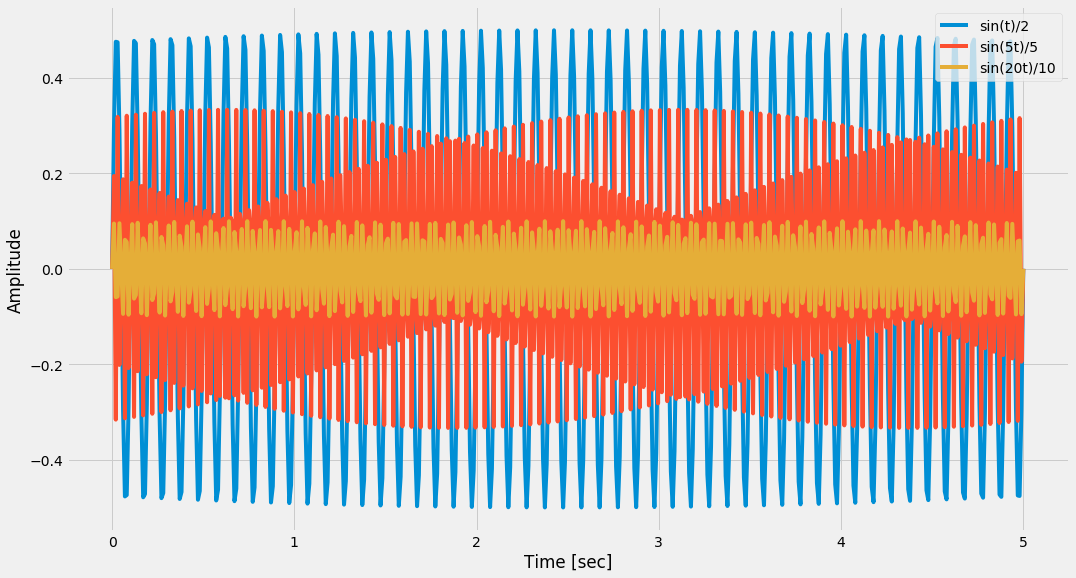

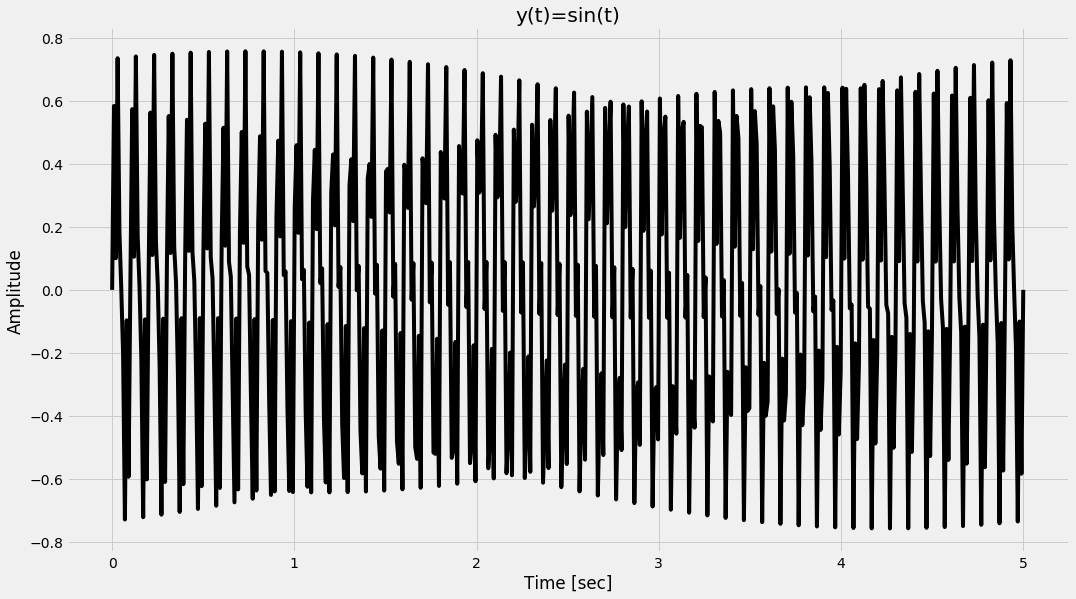

In [92]:
#Specify the sampling frequency
fs = 100.

#How long do we want our sinusoid to be in seconds
tmax = 5

#Calculate the number of points for the sinusoid
n = fs*tmax

#Frequency of the sinusoid (in Hz)
freq1 = 10.
freq2 = 40.
freq3 = 30.

#Amplitude of the sinusoids 
amp1 = 1./2.
amp2 = 1./3.
amp3 = 1./10.

#Call the function we defined earlier
y1, time = sinusoid(freq=freq1, amp=amp1, dur=tmax, fs=fs)
y2, time = sinusoid(freq=freq2, amp=amp2, dur=tmax, fs=fs)
y3, time = sinusoid(freq=freq3, amp=amp3, dur=tmax, fs=fs)

# Plot the individual sinusoids
plt.plot(time,y1,label='sin(t)/2')
plt.plot(time,y2,label='sin(5t)/5')
plt.plot(time,y3,label='sin(20t)/10')
# plt.title('y(t)=sin(t)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

#Add the sinusoids
y = y1+y2+y3

#Plot the sinusoid in time

plt.plot(time,y,'k')
plt.title('y(t)=sin(t)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

### Fourier Decomposition

Below is our code to produce and plot the Frequency Domain output

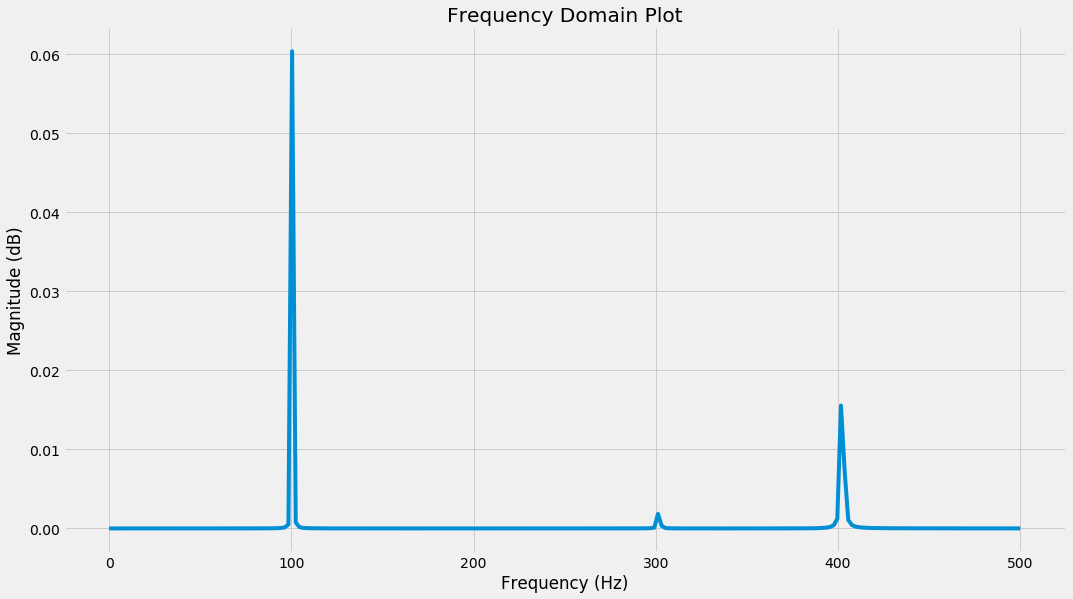

In [93]:
#Take the fft and normalize
Y = np.fft.fft(y)/len(y)

#Use only the first half of the data
Y = Y[0:len(y)/2]

#Get the magnitude in decibels
mag = np.abs(Y)**2

#Set the x-axis
fs=1000
w = np.linspace(0,m.ceil(fs/2),len(Y))

#Plot it!
plt.plot(w, mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

# Fourier Exercises
## Ex1
Edit the code above to make sine waves of different frequencies. Rerun the code above and note how the frequency plot is formed.

## Ex2

1. Generate a single sinusoid with the following parameters
    * freq=1
    * amp=1.
    * dur=1.
    * fs=10
2. What is the Nyquist Frequency?
3. Manually change the frequency to be 1, 2, 3, 4, 5, and 6

Based on the Nyquist Frequency, what is the highest frequency we are able to recover? What happens at 6 Hz?

4. Set the frequency to be the same as the sampling frequency. What happens? Why is this?

In [94]:
#500 is the highest frequency that can be recover

In [95]:
#1. will still be the same graph because it just means there are more points are in use to recover sinusoid freq

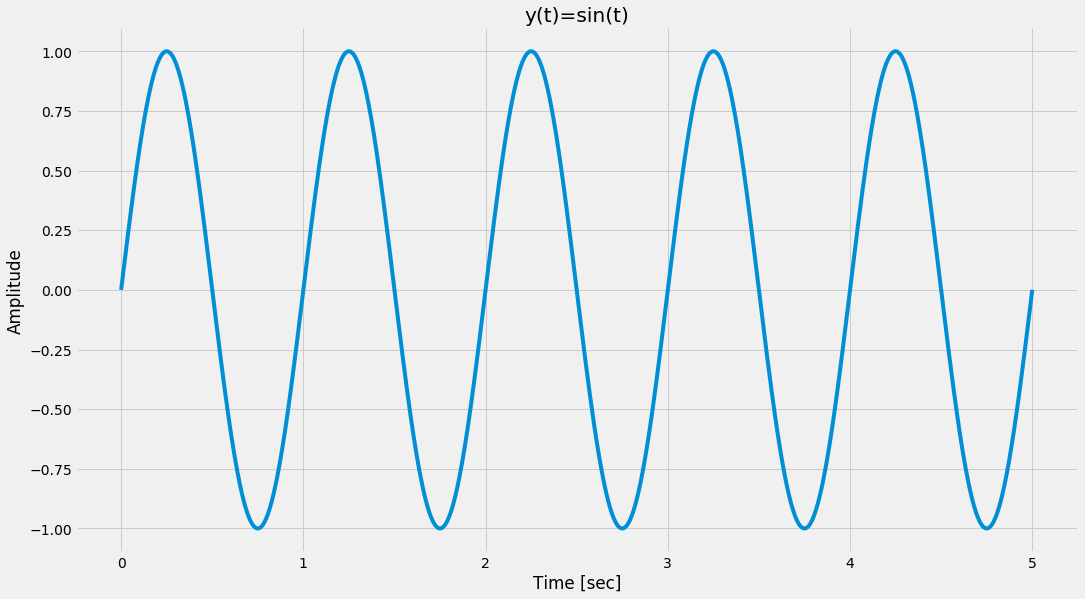

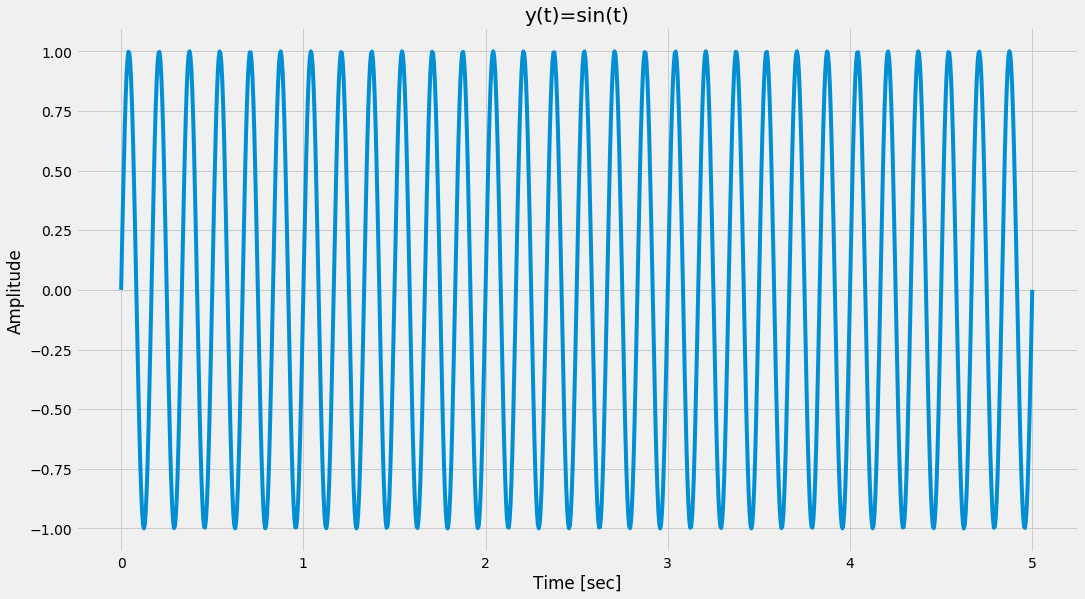

In [96]:

    
#This is where the main code begins
#Specify the sampling frequency
fs = 1000
amp=1
dur = 1

n = fs*dur

freq=1

#Call the function we defined earlier
y, time = sinusoid(freq, dur=dur, fs=fs)

#Plot the sinusoid
plt.plot(time,y)
plt.title('y(t)=sin(t)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

freq=6

#Call the function we defined earlier
y, time = sinusoid(freq, dur=dur, fs=fs)

#Plot the sinusoid
plt.plot(time,y)
plt.title('y(t)=sin(t)')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()


In [97]:
#nyquist frequency is 1/2 of the sampling frequency 

# Finish Day 5

Finish the **Plotting Exercises** and **Averaging Exercises** from Day 5. If you already have, continue on.

## Ex 3

1. Import the audio file we used in Day 5
2. Plot the time series
3. Take the Fourier Transform of the data and plot it

In [103]:
#Import numpy module
import numpy as np

#Import math module
import math as m

#Import our plotting tools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

#Import a module to read audio files
import scipy.io.wavfile as audio

In [104]:
import scipy.io.wavfile as audio
rawdata = audio.read('sound1.wav')

In [119]:
import math
data = rawdata[1]

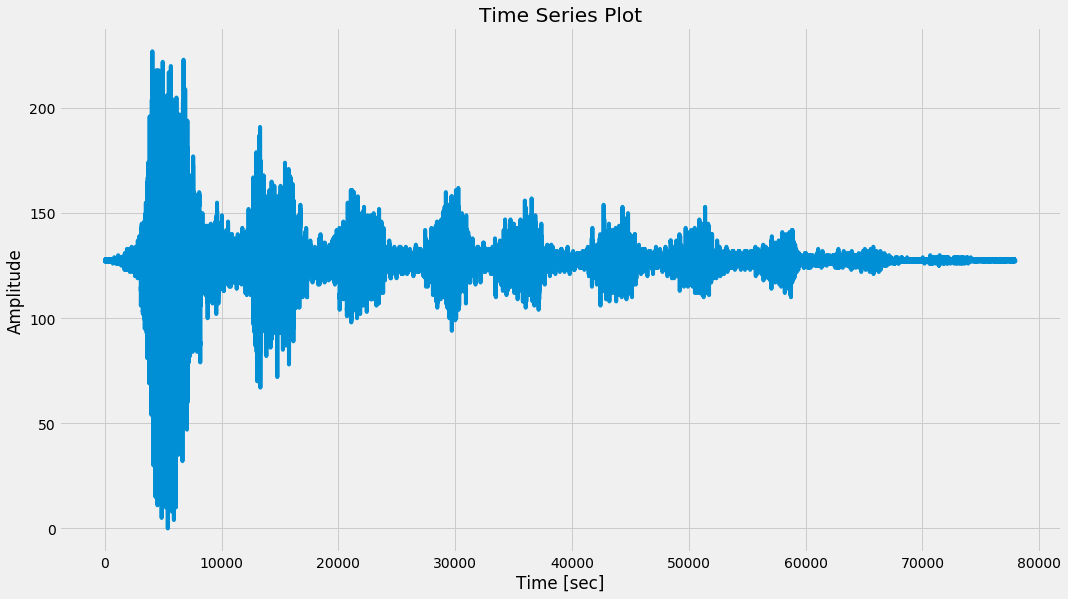

In [121]:
plt.plot(data)
plt.title('Time Series Plot')
plt.xlabel('Time [sec]')
plt.ylabel('Amplitude')
plt.show()

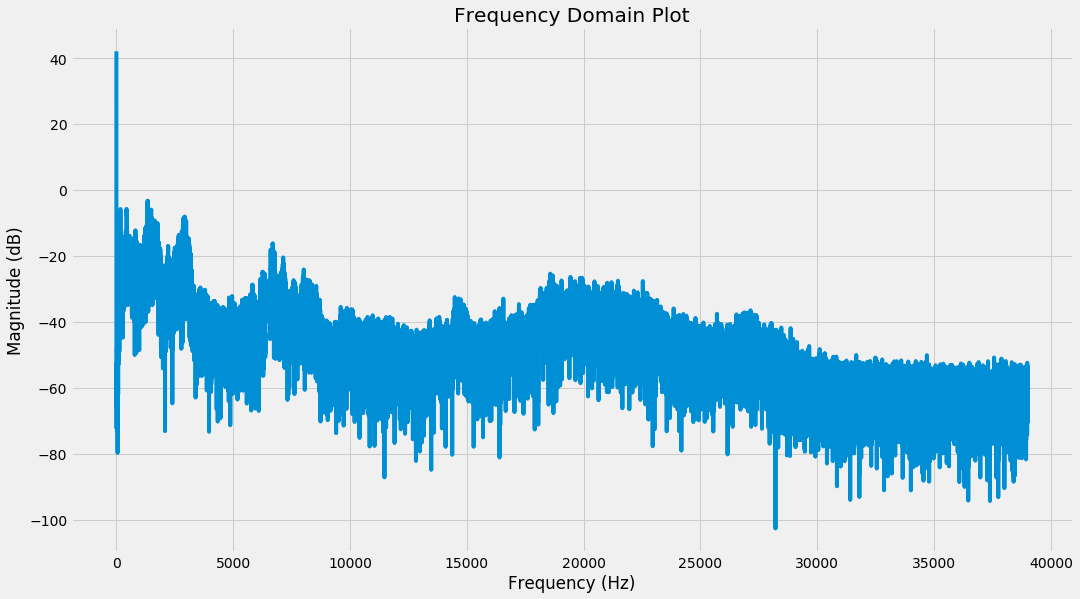

In [145]:
data=rawdata[1]
(data-128.)/128.
Y = np.fft.fft(data)/len(data)
Y = Y[0:len(data)/2]
mag = 20*np.log10(np.abs(Y))


#Plot it!
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

## Ex 4

Below is some modified code for the 'boxcar' averaging. For N = 10, 100, 1000, 10000 (4 cases), do the following.

1. Average the time series data using the function.
2. Plot the Fourier transform of the result.

What is happening to the higher frequencies?

In [134]:
def runningMean(LIST, N):
    '''
    Description: A function to calculate the 'boxcar' average, (aka moving average, windowed average), of a time series
    Paramters:
        LIST: the time series data to be averaged
        N: the length of the 'boxcar', or window, that we are averaging within.
    '''
    y = np.zeros((len(LIST)-2*N,))
    for i in range(len(LIST)-2*N):
         y[i] = np.sum(LIST[i:(i+N)])
    return y/N

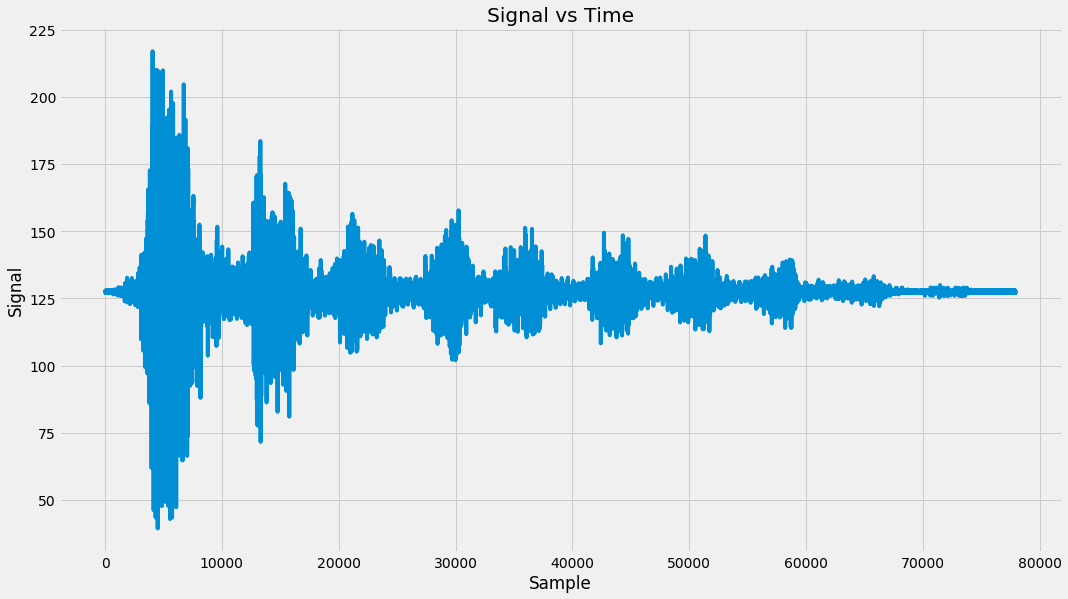

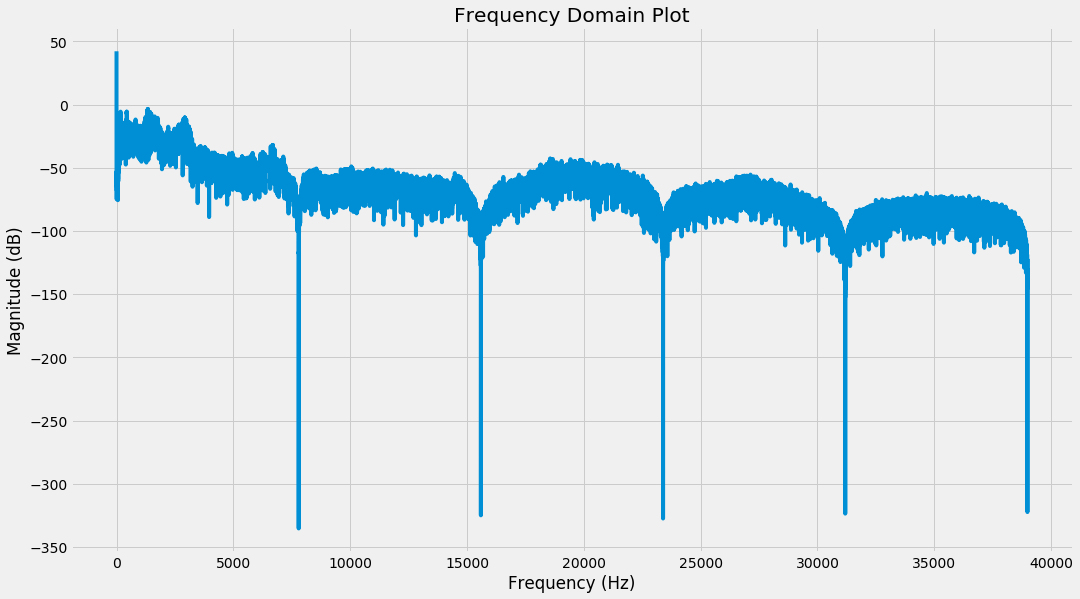

In [146]:
array = runningMean(data, 10)
plt.plot(array)
plt.title('Signal vs Time')
plt.xlabel('Sample')
plt.ylabel('Signal')
plt.show()

data=rawdata[1]
(data-128.)/128.
Y = np.fft.fft(array)/len(array)
Y = Y[0:len(data)/2]
mag = 20*np.log10(np.abs(Y))


#Plot it!
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

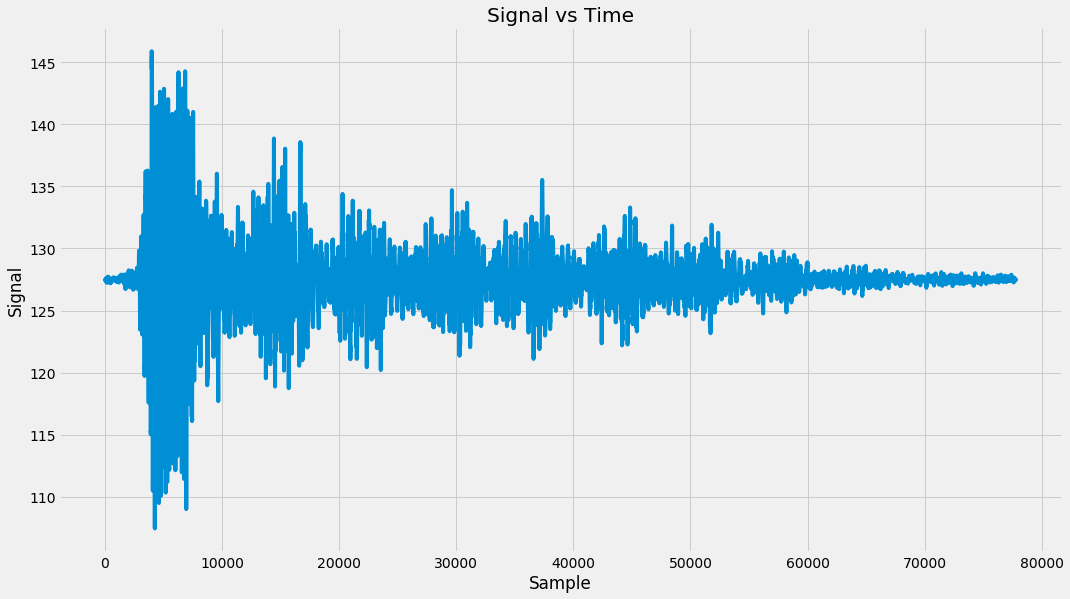

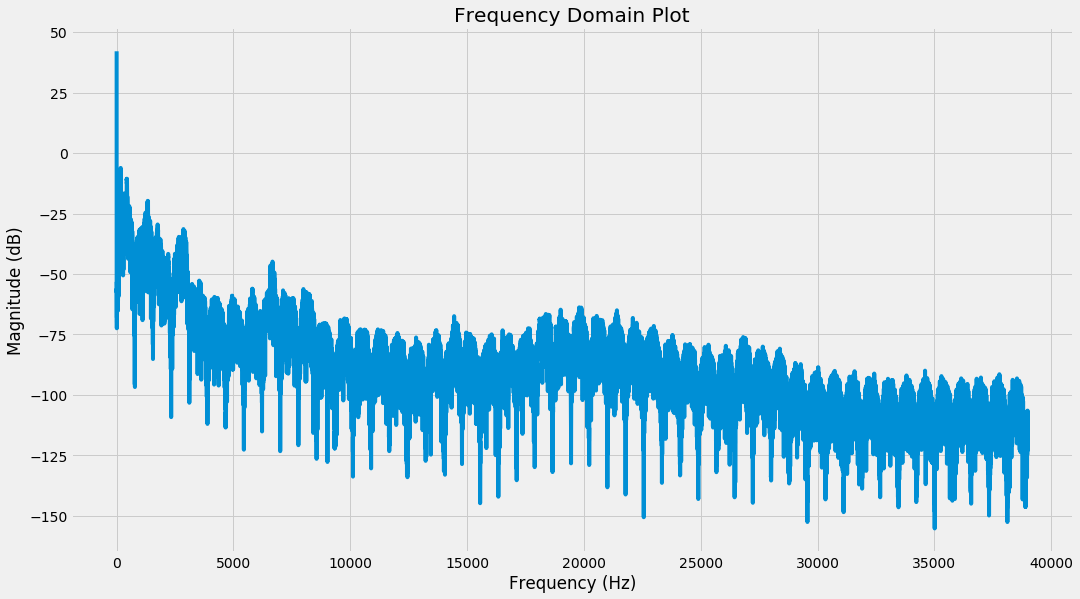

In [151]:
array = runningMean(data, 100)
plt.plot(array)
plt.title('Signal vs Time')
plt.xlabel('Sample')
plt.ylabel('Signal')
plt.show()
data=rawdata[1]
(data-128.)/128.
Y = np.fft.fft(array)/len(array)
Y = Y[0:len(data)/2]
mag = 20*np.log10(np.abs(Y))


#Plot it!
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

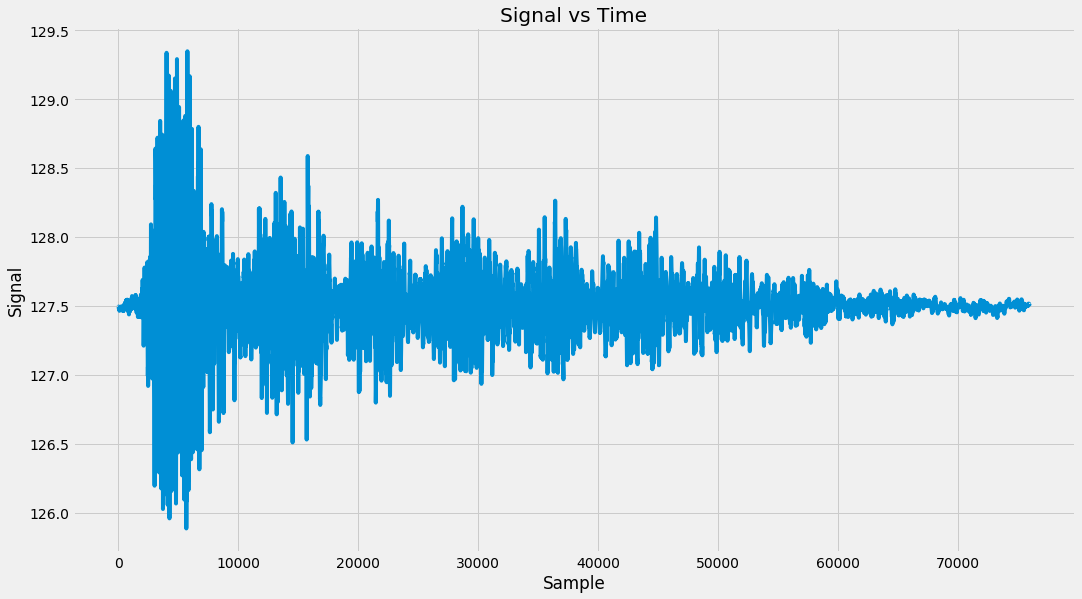

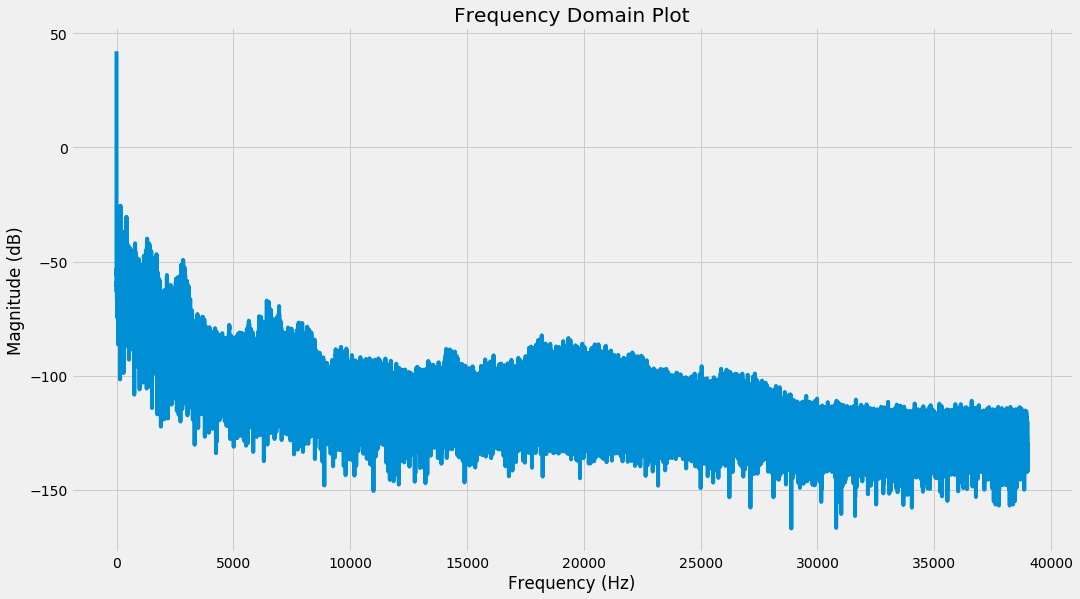

In [152]:
array = runningMean(data, 1000)
plt.plot(array)
plt.title('Signal vs Time')
plt.xlabel('Sample')
plt.ylabel('Signal')
plt.show()
data=rawdata[1]
(data-128.)/128.
Y = np.fft.fft(array)/len(array)
Y = Y[0:len(data)/2]
mag = 20*np.log10(np.abs(Y))


#Plot it!
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()


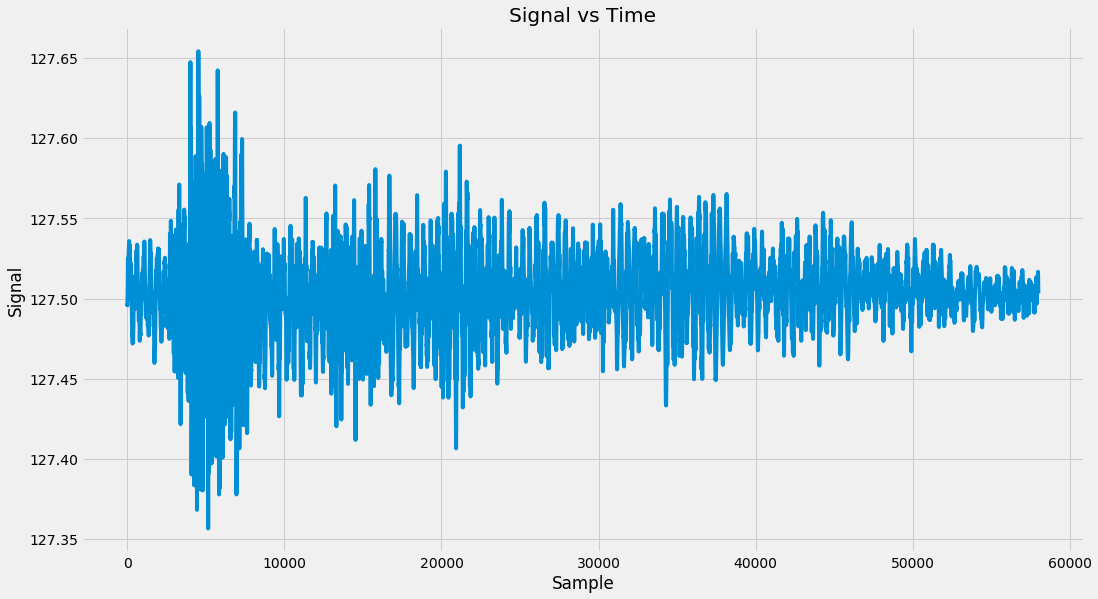

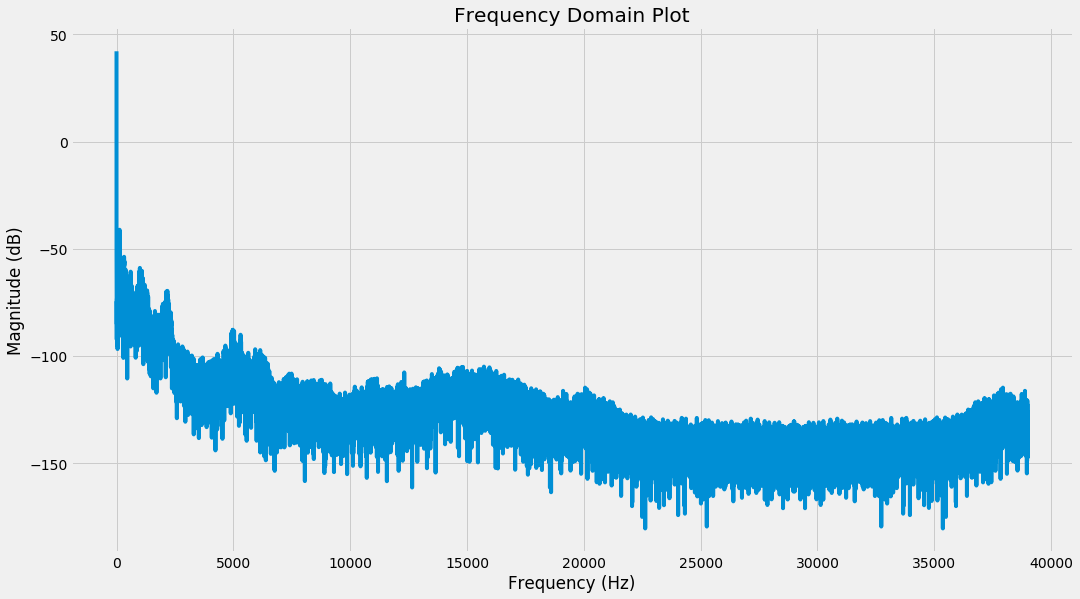

In [153]:
array = runningMean(data, 10000)
plt.plot(array)
plt.title('Signal vs Time')
plt.xlabel('Sample')
plt.ylabel('Signal')
plt.show()
data=rawdata[1]
(data-128.)/128.
Y = np.fft.fft(array)/len(array)
Y = Y[0:len(data)/2]
mag = 20*np.log10(np.abs(Y))


#Plot it!
plt.plot(mag)
plt.title('Frequency Domain Plot')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()


# Additional Exercises

## AEx 1

1. Figure out how to import an image
2. Take the 2D Fourier Transform of an image
3. Plot it's phase and magnitude.

<footer>
  <p>Created by: Kyle Adriany</p>
  <p>Contact information: <a href="mailto:kyle.adriany@gmail.com">
    kyle.adriany@gmail.com</a>.</p>
    
    <p>Copyright © 2016 Kyle Adriany</p>
    
    <p>The MIT License (MIT)</p>
    

 <p>Permission is hereby granted, free of charge, to any person obtaining a copy
 of this software and associated documentation files (the "Software"), to deal
 in the Software without restriction, including without limitation the rights
 to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 copies of the Software, and to permit persons to whom the Software is
 furnished to do so, subject to the following conditions:</p>
 
 <p>The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.</p>

 <p>THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 THE SOFTWARE.</p>
</footer>